# Расчет финансов телеграм бот

## Проанализируем наши сгенерированные данные и подведем выводы и итоги на их основе.

### **Шаг 1:** Ипортируем модули, загрузим наши данные и добавим дополнительный стобец для более удобного анализа. Также выведем 5 первых пользователей наших данных.

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

with open("data_generation.json", "r", encoding="utf-8") as file:
  data = json.load(file)
df = pd.DataFrame(data)
df["age_group"] = pd.cut(df["age"], bins=[18, 25, 35, 50, 70], labels=["18-25", "26-35", "36-50", "51-70"])
print(df.head().to_string())

     user_id                name  age gender  monthly_income  monthly_expense  difference financial_status age_group
0  773479027         Анна Фомина   65      Ж           43635            36771        6864         профицит     51-70
1  285231214     Тимофей Семенов   31      М          101192            94573        6619         профицит     26-35
2  571623589     Галина Романова   36      Ж          118078           124598       -6520          дефицит     36-50
3  460370354  Константин Данилов   41      М           69469            65219        4250         профицит     36-50
4  953925771       Роман Романов   42      М           87161            77531        9630         профицит     36-50


### **Шаг 2:** Выведем общую статистику сгенерированных данных.

In [217]:
deficit_users = len(df[df["financial_status"] == "дефицит"])
print(f"Всего пользователей: 100")
print(f"Пользователей с дефицитом: {deficit_users} ({deficit_users}%)")
print(f"Средние доходы: {df["monthly_income"].mean():.0f} рублей")
print(f"Средние расходы: {df["monthly_expense"].mean():.0f} рублей")
print(f"Средний дефицит у тех, у кого он есть: {df[df["financial_status"] == "дефицит"]["difference"].mean():.0f} рублей")
age_distribution = df["age_group"].value_counts().sort_index()
print(f"Распределение по возрастным группам:")
for age_group, count in age_distribution.items():
  print(f"{age_group}: {count} чел. ({count}%)")

Всего пользователей: 100
Пользователей с дефицитом: 45 (45%)
Средние доходы: 56395 рублей
Средние расходы: 55492 рублей
Средний дефицит у тех, у кого он есть: -8299 рублей
Распределение по возрастным группам:
18-25: 20 чел. (20%)
26-35: 20 чел. (20%)
36-50: 22 чел. (22%)
51-70: 35 чел. (35%)


### **Шаг 3:** Проанализируем наши данные и посторим графики.

**График 1:** Процент пользователей с дефицитом бюджета по возрастным группам.

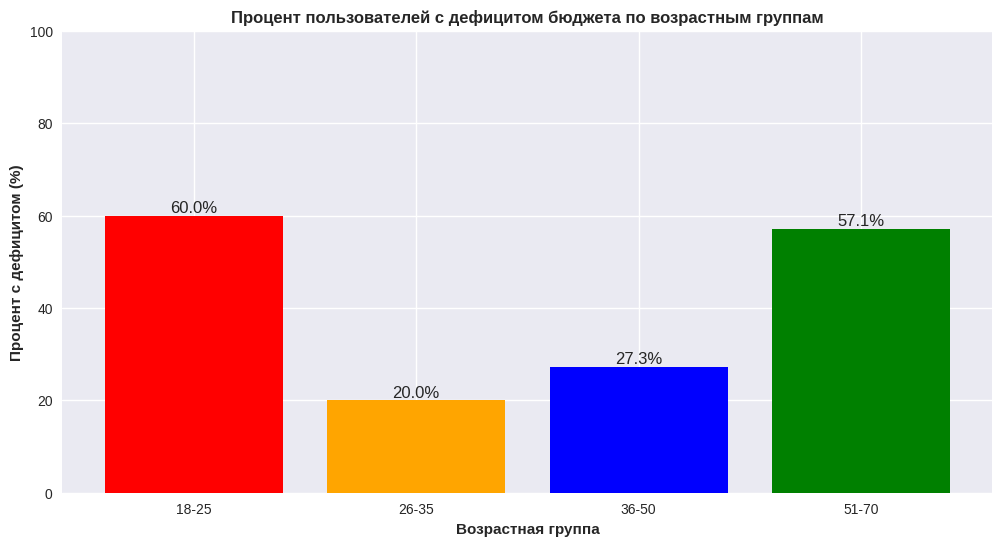

In [218]:
deficit_by_age = (df[df["financial_status"] == "дефицит"].groupby("age_group", observed=True).size() / df.groupby("age_group", observed=True).size() * 100)
bars = plt.bar(deficit_by_age.index, deficit_by_age.values, color=["red", "orange", "blue", "green"])
plt.title("Процент пользователей с дефицитом бюджета по возрастным группам", fontweight="bold")
plt.xlabel("Возрастная группа", fontweight="bold")
plt.ylabel("Процент с дефицитом (%)", fontweight="bold")
plt.bar_label(bars, labels=[f"{i:.1f}%" for i in deficit_by_age.values])
plt.ylim(0, 100)
plt.show()

1. Наибольший процент дефицита наблюдается у молодежи (18-25 лет) - 60%.
2. У старшего поколения (51-70 лет) также высокий уровень дефицита - 57.1%.
3. Возрастные группы (26-50 лет) демонстрируют лучшую финансовую стабильность - 20-27.3%.

**Выводы:** Молодежь сталкивается с проблемой "тратить больше, чем зарабатывать" чаще всего.

**График 2:** Распределение дефицита бюджета по полу.

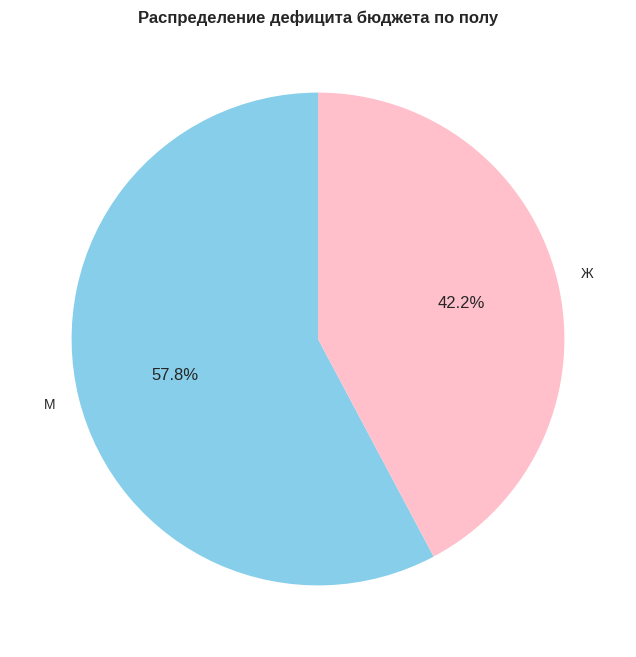

In [219]:
deficit_users = df[df["financial_status"] == "дефицит"]
deficit_by_gender = deficit_users["gender"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(deficit_by_gender.values, labels=deficit_by_gender.index, autopct="%1.1f%%", colors=["skyblue", "pink"], startangle=90)
plt.title("Распределение дефицита бюджета по полу", fontweight="bold")
plt.show()

Дефицит бюджета распределен относительно равномерно между полами, в нашем случае преобладание дифицита у мужчин.

**Выводы:** Финансовые трудности затрагивают как мужчин, так и женщин.

**График 3:** Средние доходы и расходы мужчин по возрастным группам.

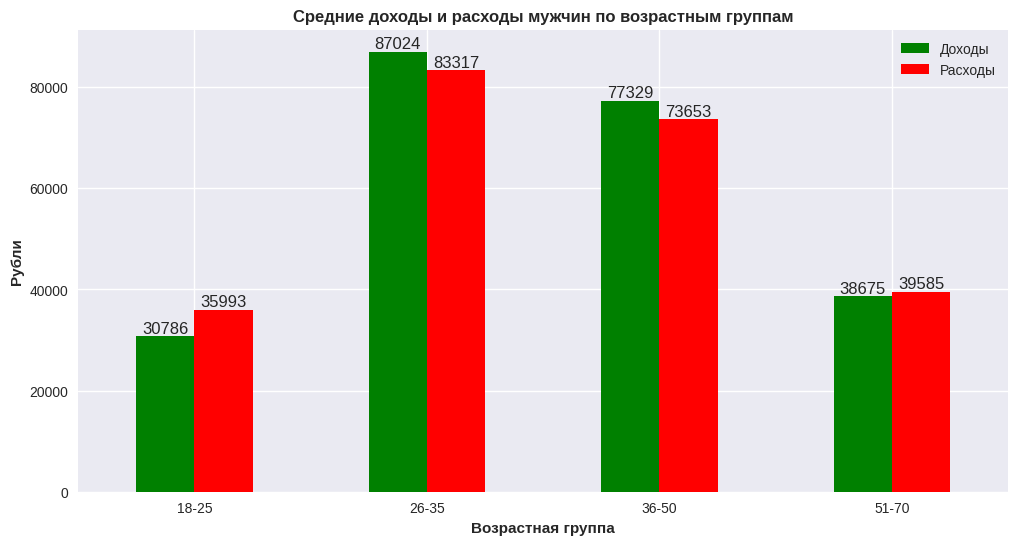

In [220]:
male_df = df[df["gender"] == "М"]
male_stats = male_df.groupby("age_group", observed=True)[["monthly_income", "monthly_expense"]].mean().round()
ax = male_stats.plot(kind="bar", color=["green", "red"])
for container in ax.containers:
  ax.bar_label(container, fmt="%.0f")
plt.title("Средние доходы и расходы мужчин по возрастным группам", fontweight="bold")
plt.xlabel("Возрастная группа", fontweight="bold")
plt.ylabel("Рубли", fontweight="bold")
plt.legend(["Доходы", "Расходы"])
plt.xticks(rotation=0)
plt.show()

1. Доходы мужчин растут с возрастом, достигая пика в 26-35 лет, после чего идут на спад, расходы следуют за доходами, но в некоторых группах превышают их.
2. Наибольший разрыв между доходами и расходами наблюдается в проблемных возрастных группах

**Выводы:** Соотвествуют выводам из графика 1, наибольшая проблема с контролем финансов у группы 18-25 лет.

**График 4:** Средние доходы и расходы женщин по возрастным группам

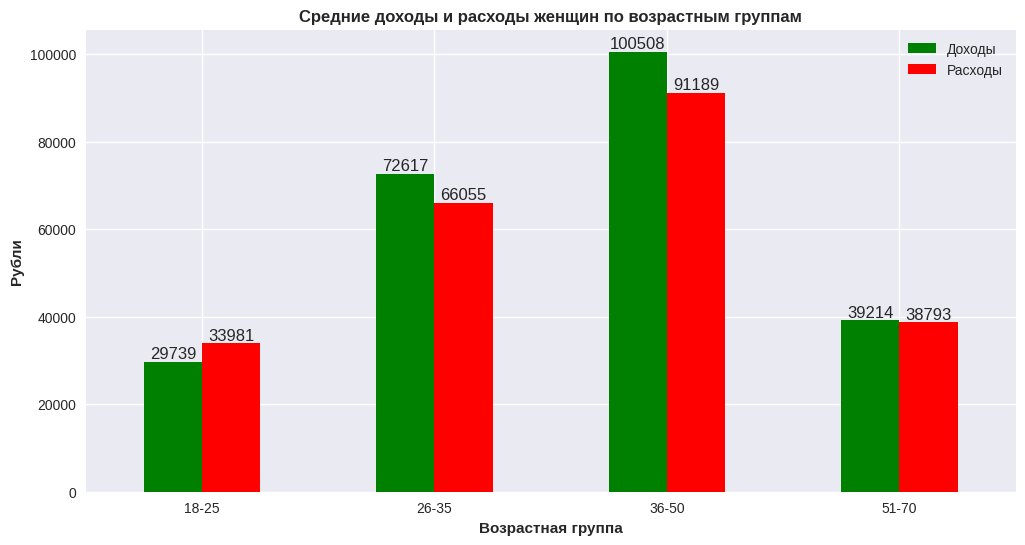

In [221]:
female_df = df[df["gender"] == "Ж"]
female_stats = female_df.groupby("age_group", observed=True)[["monthly_income", "monthly_expense"]].mean().round()
ax = female_stats.plot(kind="bar", color=["green", "red"])
for container in ax.containers:
  ax.bar_label(container, fmt="%.0f")
plt.title("Средние доходы и расходы женщин по возрастным группам", fontweight="bold")
plt.xlabel("Возрастная группа", fontweight="bold")
plt.ylabel("Рубли", fontweight="bold")
plt.legend(["Доходы", "Расходы"])
plt.xticks(rotation=0)
plt.show()

1. Доходы женщин растут с возрастом, достигая пика в 36-50 лет, после чего идет резкий спад, расходы следуют за доходами, но в некоторых группах превышают их.
2. Разрыв между доходами и расходами наблюдается в молодой возрастной группе.

**Выводы:** Соотвествуют выводам из графика 1, наибольшая проблема с контролем финансов у группы 18-25 лет.

### **Шаг 4:** Сделаем выводы.

**Выявленные проблемы:**

1. Массовый характер дефицита - 45% пользователей тратят больше, чем зарабатывают.
2. Чаще всего расходов больше, чем доходов у молодежи и пенсионеров.
3. Отсутствие финансовой грамотности - люди не умеют планировать бюджет.

**Полезность бота:**

1. Учет расходов помогает понять, куда уходят деньги.
2. Уведомления о превышении лимитов предотвращают долги.
3. Постепенное повышение финансовой грамотности.
4. Удобство полного финансового контроля в одном месте.

**Вывод:** Проект помогает людям решить реальные финансовые проблемы и снижает долговую нагрузку. Бот особенно важен в условиях экономической нестабильности, когда навыки грамотного управления финансами становятся критически важными для выживания.